# Import necessary libraries

In [563]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
import random

# Recuperation des datasets

In [564]:
df_train = pd.read_csv('train.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [565]:
expense_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df_train['total_expenses'] = df_train[expense_columns].fillna(0).sum(axis=1)

# Find missing values

In [566]:
missing_values = df_train.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId         0
HomePlanet        201
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
total_expenses      0
dtype: int64


# Correlations

## Home planet and destination

In [567]:
correlation_table = pd.crosstab(df_train['HomePlanet'], df_train['Destination'], margins=True)
correlation_table

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,All
HomePlanet,,,,
Earth,690,712,3101,4503
Europa,886,19,1189,2094
Mars,193,49,1475,1717
All,1769,780,5765,8314


In [568]:
percentage_table = pd.crosstab(df_train['HomePlanet'], df_train['Destination'], normalize='index') * 100
percentage_table.round(2)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,15.32,15.81,68.87
Europa,42.31,0.91,56.78
Mars,11.24,2.85,85.91


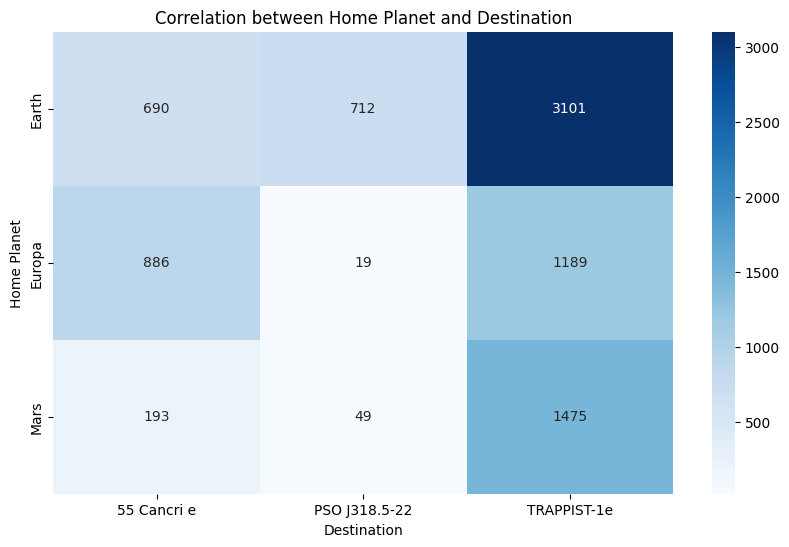

In [569]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_table.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues')
plt.title('Correlation between Home Planet and Destination')
plt.xlabel('Destination')
plt.ylabel('Home Planet')
plt.show()

## Cabin and Home Planet

In [570]:
df_train['Cabin_Deck'] = df_train['Cabin'].str[0]
df_train['Cabin_Side'] = df_train['Cabin'].str[-1]
df_train[['Cabin_Deck', 'Cabin_Side']].head()

,Cabin_Deck,Cabin_Side
0,B,P
1,F,S
2,A,S
3,A,S
4,F,S


In [571]:
cabin_deck_planet = pd.crosstab(df_train['HomePlanet'], df_train['Cabin_Deck'], margins=True)
deck_percentage = pd.crosstab(df_train['HomePlanet'], df_train['Cabin_Deck'], normalize='index') * 100
deck_percentage.round(2)

Cabin_Deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0.00,0.0,0.00,0.00,8.76,35.81,55.42,0.00
Europa,12.17,37.0,35.46,8.99,6.18,0.00,0.00,0.19
Mars,0.00,0.0,0.00,16.38,19.16,64.46,0.00,0.00


In [572]:
cabin_side_planet = pd.crosstab(df_train['HomePlanet'], df_train['Cabin_Side'], margins=True)
side_percentage = pd.crosstab(df_train['HomePlanet'], df_train['Cabin_Side'], normalize='index') * 100
side_percentage.round(2)

Cabin_Side,P,S
HomePlanet,,
Earth,50.37,49.63
Europa,46.14,53.86
Mars,51.57,48.43


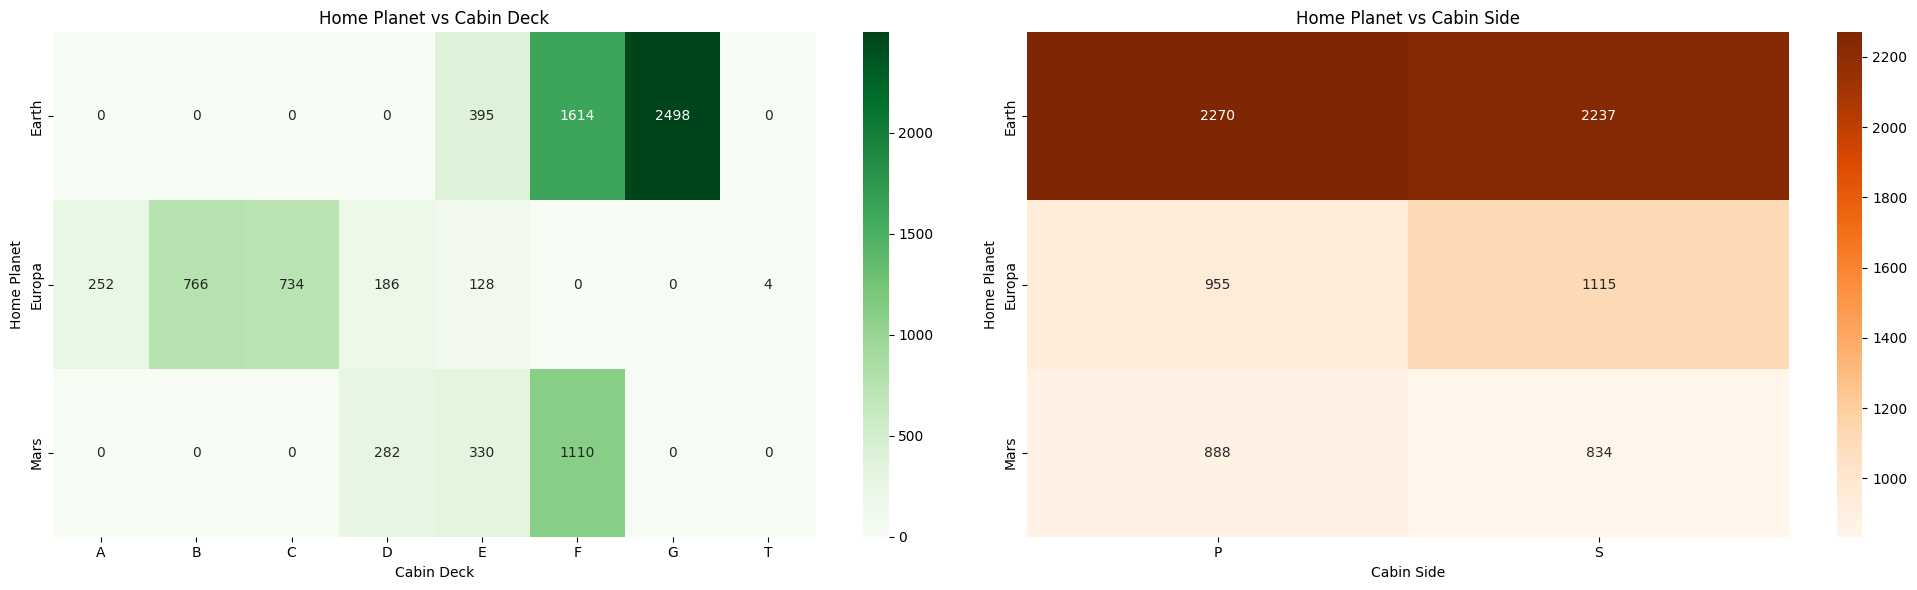

In [573]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(cabin_deck_planet.iloc[:-1, :-1], annot=True, fmt='d', cmap='Greens', ax=ax1)
ax1.set_title('Home Planet vs Cabin Deck')
ax1.set_xlabel('Cabin Deck')
ax1.set_ylabel('Home Planet')

sns.heatmap(cabin_side_planet.iloc[:-1, :-1], annot=True, fmt='d', cmap='Oranges', ax=ax2)
ax2.set_title('Home Planet vs Cabin Side')
ax2.set_xlabel('Cabin Side')
ax2.set_ylabel('Home Planet')

plt.tight_layout()
plt.show()

## Cabin and Destination

In [574]:
cabin_deck_planet = pd.crosstab(df_train['Destination'], df_train['Cabin_Deck'], margins=True)
deck_percentage = pd.crosstab(df_train['Destination'], df_train['Cabin_Deck'], normalize='index') * 100
deck_percentage.round(2)

Cabin_Deck,A,B,C,D,E,F,G,T
Destination,,,,,,,,
55 Cancri e,6.17,19.03,18.11,6.46,6.63,22.74,20.86,0.00
PSO J318.5-22,0.26,0.39,1.67,2.19,5.27,30.98,59.25,0.00
TRAPPIST-1e,2.45,7.36,7.00,5.84,12.02,36.07,29.16,0.09


In [575]:
cabin_side_planet = pd.crosstab(df_train['Destination'], df_train['Cabin_Side'], margins=True)
deck_percentage = pd.crosstab(df_train['Destination'], df_train['Cabin_Side'], normalize='index') * 100
deck_percentage.round(2)

Cabin_Side,P,S
Destination,,
55 Cancri e,48.23,51.77
PSO J318.5-22,50.51,49.49
TRAPPIST-1e,49.79,50.21


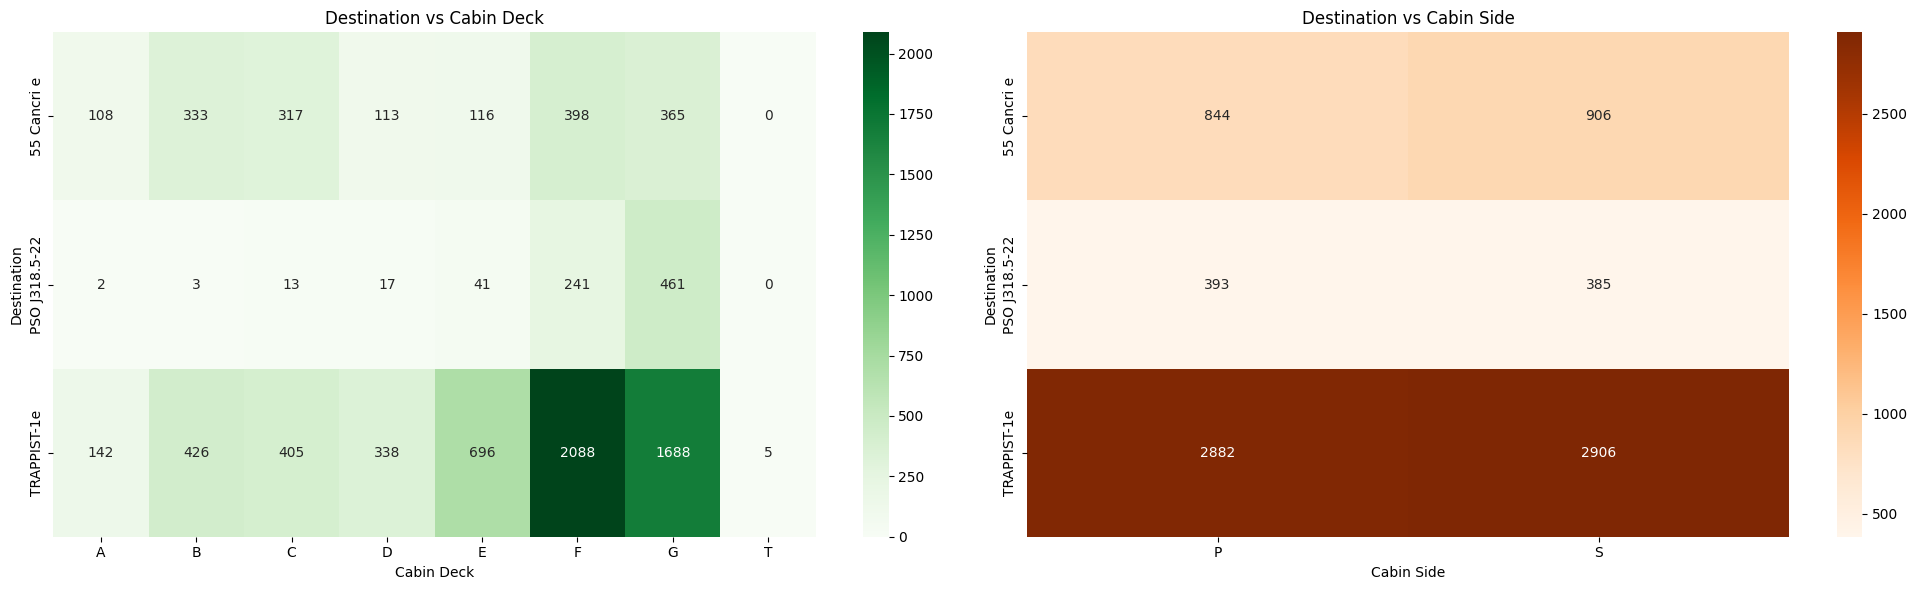

In [576]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(cabin_deck_planet.iloc[:-1, :-1], annot=True, fmt='d', cmap='Greens', ax=ax1)
ax1.set_title('Destination vs Cabin Deck')
ax1.set_xlabel('Cabin Deck')
ax1.set_ylabel('Destination')

sns.heatmap(cabin_side_planet.iloc[:-1, :-1], annot=True, fmt='d', cmap='Oranges', ax=ax2)
ax2.set_title('Destination vs Cabin Side')
ax2.set_xlabel('Cabin Side')
ax2.set_ylabel('Destination')

plt.tight_layout()
plt.show()

## Age and VIP

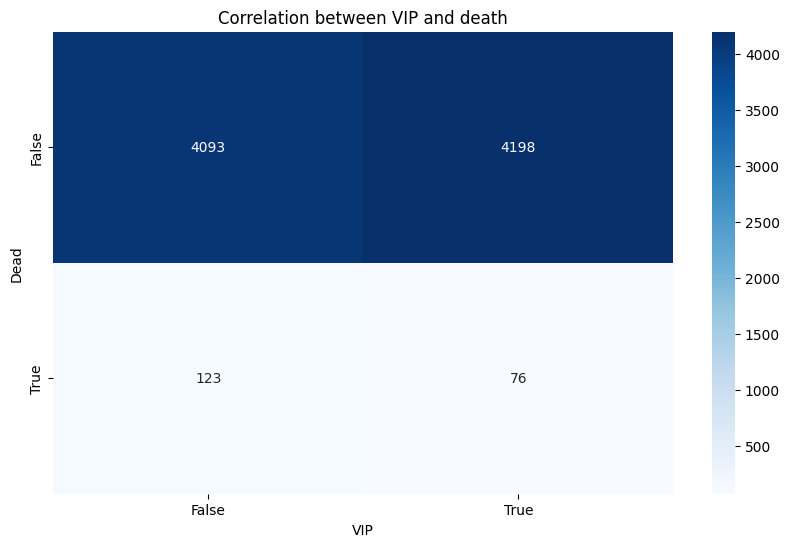

In [577]:
correlation_table_age = pd.crosstab(df_train['VIP'], df_train['Transported'], margins=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_table_age.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues')
plt.title('Correlation between VIP and death')
plt.xlabel('VIP')
plt.ylabel('Dead')
plt.show()

# Fill empty values 

## CryoSleep




In [578]:
mask_missing_cryosleep = df_train['CryoSleep'].isnull()
mask_zero_expenses = df_train['total_expenses'] == 0

df_train.loc[mask_missing_cryosleep & mask_zero_expenses, 'CryoSleep'] = True
df_train.loc[mask_missing_cryosleep & ~mask_zero_expenses, 'CryoSleep'] = False

## Expense Of Cryo

In [579]:
# Create mask for passengers in CryoSleep
cryosleep_mask = df_train['CryoSleep']

# Fill expense columns with 0 for CryoSleep passengers
for col in expense_columns:
    df_train.loc[cryosleep_mask, col] = 0

## Cabin

In [580]:
def assign_cabin_deck(home_planet):
    if home_planet == 'Earth':
        return random.choices(['G', 'F'], weights=[2, 1])[0]
    elif home_planet == 'Europa':
        return random.choices(['B', 'C'], weights=[1, 1])[0]
    elif home_planet == 'Mars':
        return random.choices(['F', 'E'], weights=[4, 1])[0]
    else:
        return 'F'

missing_cabin_mask = df_train['Cabin'].isnull()

for idx in df_train[missing_cabin_mask].index:
    home_planet = df_train.loc[idx, 'HomePlanet']
    cabin_number = random.randint(1, 2000)
    cabin_side = random.choice(['P', 'S'])
    if pd.notna(home_planet):
        new_deck = assign_cabin_deck(home_planet)
        if new_deck:
            df_train.loc[idx, 'Cabin'] = f"{new_deck}/{cabin_number}/{cabin_side}"
    else:
        new_deck='F'
        df_train.loc[idx, 'Cabin'] = f"{new_deck}/{cabin_number}/{cabin_side}"


## Home Planet

In [581]:
def assign_home_planet(cabin_deck):
    if cabin_deck in ['A','B','C']:
        return 'Europa'
    elif cabin_deck == 'D':
        return random.choices(['Europa', 'Mars'], weights=[2, 3])[0]
    elif home_planet == 'E':
        return random.choices(['Earth', 'Europa', 'Mars'], weights=[4, 1, 3])[0]
    elif home_planet == 'F':
        return random.choices(['Earth', 'Mars'], weights=[16, 11])[0]
    elif home_planet == 'G':
        return 'Earth'
    else:
        return 'Europa'

missing_home_planet = df_train['HomePlanet'].isnull()

for idx in df_train[missing_home_planet].index:
    cabin_deck = df_train.loc[idx, 'Cabin'][0]
    df_train.loc[idx, 'HomePlanet'] = assign_home_planet(cabin_deck)

## Planet destination

In [582]:
def assign_destination_planet(home_planet):
    if home_planet == 'Earth':
        return random.choices(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], weights=[31, 7, 7])[0]
    elif home_planet == 'Europa':
        return random.choices(['TRAPPIST-1e', '55 Cancri e'], weights=[11, 8])[0]
    else :
        return 'TRAPPIST-1e'

missing_destination = df_train['Destination'].isnull()

for idx in df_train[missing_destination].index:
    home_planet = df_train.loc[idx, 'HomePlanet']
    df_train.loc[idx, 'Destination'] = assign_destination_planet(home_planet)

## Age

In [583]:
# Fill missing age values with median
age_median = df_train['Age'].median()
missing_age_count = df_train['Age'].isnull().sum()

df_train['Age'] = df_train['Age'].fillna(age_median)

## Expenses

In [584]:
missing_before = df_train[expense_columns].isnull().sum()

for idx, row in df_train.iterrows():
    passenger_expenses = row[expense_columns]
    non_null_expenses = passenger_expenses.dropna()

    if len(non_null_expenses) > 0:
        passenger_mean = non_null_expenses.mean()

        for col in expense_columns:
            if pd.isna(row[col]):
                df_train.loc[idx, col] = passenger_mean
    else:
        for col in expense_columns:
            if pd.isna(row[col]):
                df_train.loc[idx, col] = df_train[col].mean()

missing_after = df_train[expense_columns].isnull().sum()

## VIP

In [585]:
missing_vip_before = df_train['VIP'].isnull().sum()
high_expense_mask = df_train['total_expenses'] > 3000

df_train.loc[high_expense_mask & df_train['VIP'].isnull(), 'VIP'] = True
df_train.loc[df_train['VIP'].isnull(), 'VIP'] = False

missing_vip_after = df_train['VIP'].isnull().sum()
vip_filled = missing_vip_before - missing_vip_after
new_vips = df_train.loc[high_expense_mask & (df_train['VIP']), 'VIP'].count()

In [586]:
missing_values = df_train.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              200
Transported         0
total_expenses      0
Cabin_Deck        199
Cabin_Side        199
dtype: int64
